# Regression Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

I {**HENRI EDWARDS**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Predict Overview: Spain Electricity Shortfall Challenge

The government of Spain is considering an expansion of it's renewable energy resource infrastructure investments. As such, they require information on the trends and patterns of the countries renewable sources and fossil fuel energy generation. Your company has been awarded the contract to:

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a model that is capable of forecasting the three hourly demand shortfalls;
- 5. evaluate the accuracy of the best machine learning model;
- 6. determine what features were most important in the model’s prediction decision, and
- 7. explain the inner working of the model to a non-technical audience.

Formally the problem statement was given to you, the senior data scientist, by your manager via email reads as follow:

> In this project you are tasked to model the shortfall between the energy generated by means of fossil fuels and various renewable sources - for the country of Spain. The daily shortfall, which will be referred to as the target variable, will be modelled as a function of various city-specific weather features such as `pressure`, `wind speed`, `humidity`, etc. As with all data science projects, the provided features are rarely adequate predictors of the target variable. As such, you are required to perform feature engineering to ensure that you will be able to accurately model Spain's three hourly shortfalls.
 
On top of this, she has provided you with a starter notebook containing vague explanations of what the main outcomes are. 

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section you are required to import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. |

---

In [32]:
# Libraries for data loading, data manipulation and data visulisation
import numpy as np
import pandas as pd

# Libraries for data preparation and model building
import matplotlib.pyplot as plt
import seaborn as sns

# Setting global constants to ensure notebook results are reproducible
PARAMETER_CONSTANT = 42

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load the data from the `df_train` file into a DataFrame. |

---

In [33]:
df_train = pd.read_csv('df_train.csv')
df_test = pd.read_csv('df_test.csv')

In [34]:
df = pd.concat([df_train, df_test])
df.shape

(11683, 49)

<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, you are required to perform an in-depth analysis of all the variables in the DataFrame. |

---


In [6]:
# look at data statistics
df.describe()

,Unnamed: 0,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
count,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,...,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,8763.000000
mean,5841.000000,2.433750,0.118698,2.692873,63.774687,58.721818,43.440712,1.958629,14.155268,159.878855,...,289.377372,289.869413,284.993657,286.447784,288.616766,288.095397,291.263219,288.282055,287.056222,10673.857612
std,3372.735932,1.831762,0.334918,2.321759,22.219380,24.390621,32.046215,1.696043,24.541321,101.005654,...,9.594562,6.680538,6.730076,6.738466,6.391989,6.898601,8.136234,9.258559,9.093455,5218.046404
min,0.000000,0.000000,0.000000,0.000000,8.333333,6.333333,0.000000,0.000000,0.000000,0.000000,...,264.983333,270.816667,264.483333,267.483333,269.483333,269.063000,270.150000,264.983333,264.983333,-6618.000000
25%,2920.500000,1.000000,0.000000,1.000000,46.333333,38.000000,12.000000,1.000000,0.000000,76.666667,...,282.150000,284.816667,280.122526,281.483448,284.150000,283.150000,285.483333,281.250000,280.150000,7390.333333
50%,5841.000000,2.000000,0.000000,2.000000,67.000000,59.333333,45.000000,1.333333,0.000000,145.666667,...,287.843333,289.426667,284.816667,286.193333,288.276333,287.816667,290.382000,286.923333,285.816667,11114.666667
75%,8761.500000,3.333333,0.100000,3.666667,83.000000,80.000000,75.000000,2.666667,20.000000,233.333333,...,296.483333,295.150000,289.816667,291.040000,293.483333,292.483333,296.641333,294.993167,293.708917,14498.166667
max,11682.000000,13.333333,3.000000,52.000000,100.000000,100.000000,100.000000,12.666667,97.333333,360.000000,...,314.483333,308.150000,309.816667,310.710000,306.816667,317.966667,314.816667,313.133333,310.383333,31904.000000


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11683 entries, 0 to 2919
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            11683 non-null  int64  
 1   time                  11683 non-null  object 
 2   Madrid_wind_speed     11683 non-null  float64
 3   Valencia_wind_deg     11683 non-null  object 
 4   Bilbao_rain_1h        11683 non-null  float64
 5   Valencia_wind_speed   11683 non-null  float64
 6   Seville_humidity      11683 non-null  float64
 7   Madrid_humidity       11683 non-null  float64
 8   Bilbao_clouds_all     11683 non-null  float64
 9   Bilbao_wind_speed     11683 non-null  float64
 10  Seville_clouds_all    11683 non-null  float64
 11  Bilbao_wind_deg       11683 non-null  float64
 12  Barcelona_wind_speed  11683 non-null  float64
 13  Barcelona_wind_deg    11683 non-null  float64
 14  Madrid_clouds_all     11683 non-null  float64
 15  Seville_wind_speed  

In [36]:
df['Madrid_wind_speed'].sort_values().head(5)

5189    0.0
5685    0.0
2883    0.0
2884    0.0
5903    0.0
Name: Madrid_wind_speed, dtype: float64

In [9]:
df['Seville_pressure'].unique()

array(['sp25', 'sp23', 'sp24', 'sp21', 'sp16', 'sp9', 'sp15', 'sp19',
       'sp22', 'sp11', 'sp8', 'sp4', 'sp6', 'sp13', 'sp17', 'sp20',
       'sp18', 'sp14', 'sp12', 'sp5', 'sp10', 'sp7', 'sp3', 'sp2', 'sp1'],
      dtype=object)

In [405]:
df['Valencia_wind_deg'].unique()

array(['level_5', 'level_10', 'level_9', 'level_8', 'level_7', 'level_6',
       'level_4', 'level_3', 'level_1', 'level_2'], dtype=object)

In [406]:
df['time'].head()

0    2015-01-01 03:00:00
1    2015-01-01 06:00:00
2    2015-01-01 09:00:00
3    2015-01-01 12:00:00
4    2015-01-01 15:00:00
Name: time, dtype: object

<function matplotlib.pyplot.show(close=None, block=None)>

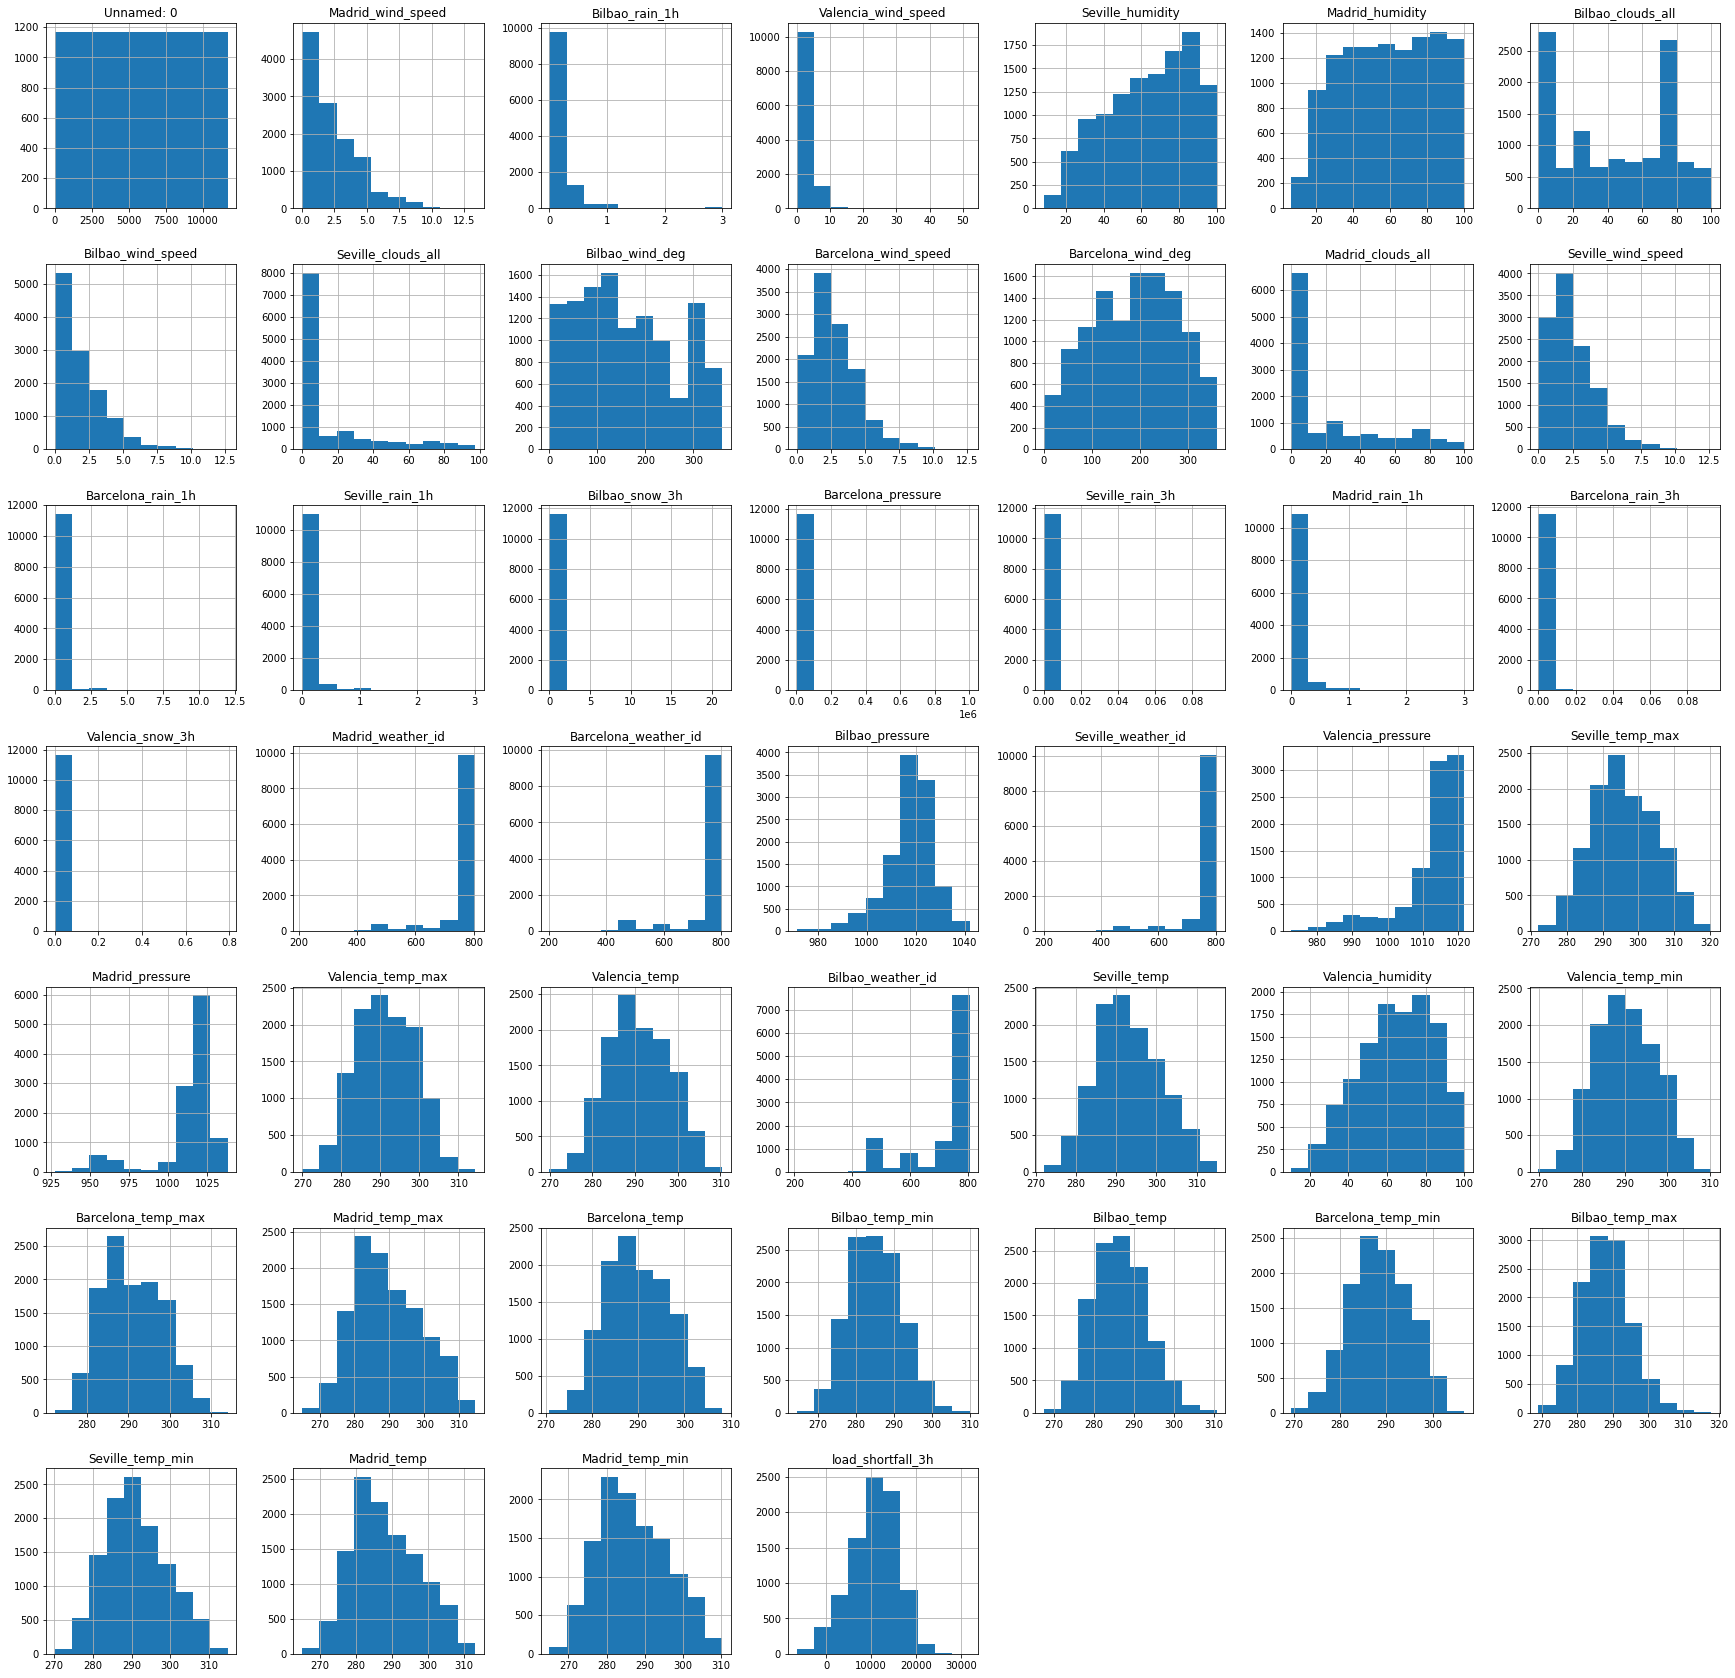

In [410]:
# Distributions & Extreme Values
df.hist(figsize=(30,30)) 
plt.show

In [37]:
#Look for missing values
df.isnull().sum().head()

Unnamed: 0           0
time                 0
Madrid_wind_speed    0
Valencia_wind_deg    0
Bilbao_rain_1h       0
dtype: int64

<AxesSubplot:>

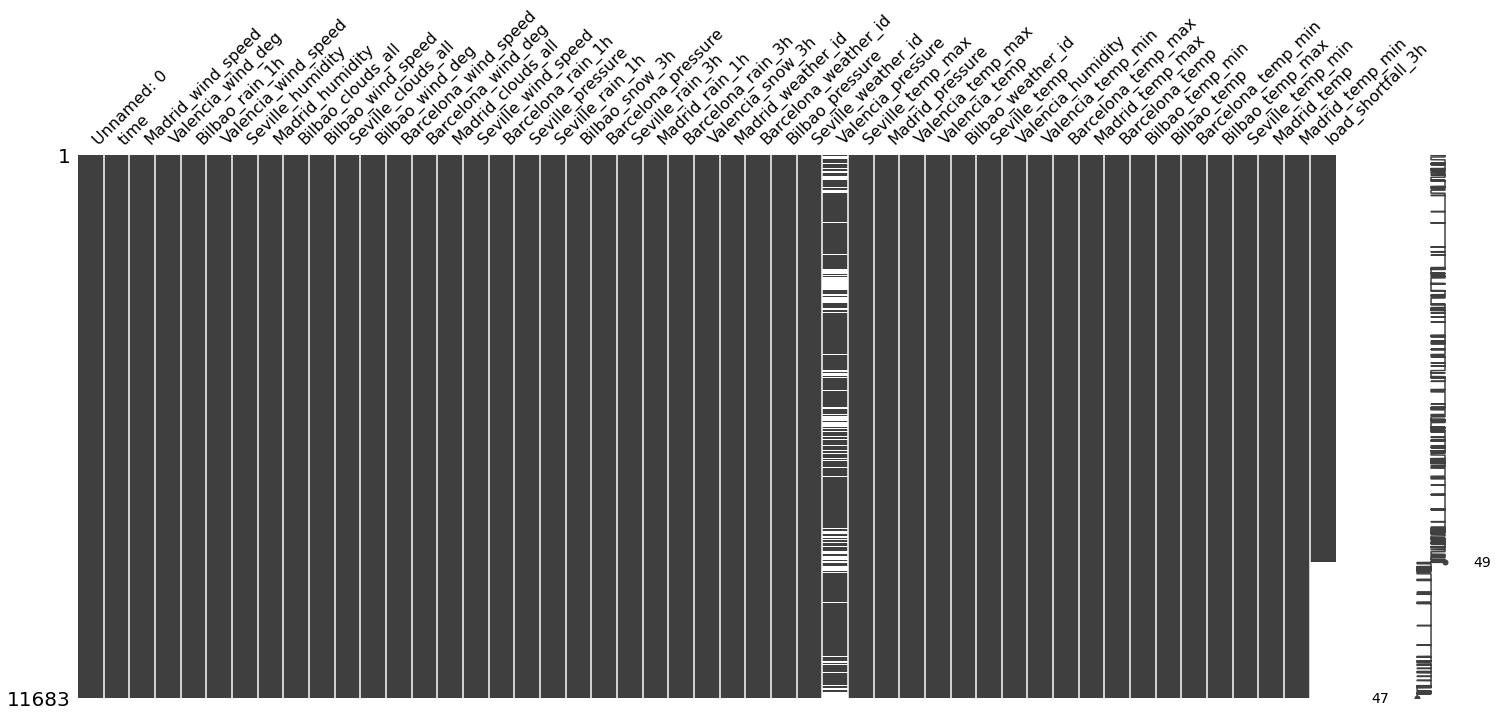

In [409]:
import missingno as msno
msno.matrix(df)

In [38]:
# evaluate correlation
df[df.columns[:]].corr()['load_shortfall_3h'][:].sort_values(ascending=False).to_frame().head(5)

,load_shortfall_3h
load_shortfall_3h,1.000000
Valencia_temp_min,0.201863
Barcelona_temp_min,0.195984
Unnamed: 0,0.192612
Madrid_temp,0.186036


In [412]:
df.corr().head()

,Unnamed: 0,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
Unnamed: 0,1.000000,-0.070696,-0.228261,-0.005374,0.019263,0.009600,-0.051515,0.102284,-0.060676,-0.084866,...,0.045680,0.056669,0.026515,0.067137,0.107337,0.125371,-0.021348,0.045585,0.042448,0.192612
Madrid_wind_speed,-0.070696,1.000000,0.247761,0.524549,-0.114347,-0.116172,0.225566,0.382617,0.185177,0.272466,...,0.064625,0.051990,0.051152,0.036799,0.059285,0.020677,0.077828,0.078077,0.064200,-0.150981
Bilbao_rain_1h,-0.228261,0.247761,1.000000,0.240118,0.063048,0.098192,0.361385,0.075120,0.074137,0.255858,...,-0.148284,-0.138938,-0.143191,-0.182022,-0.114654,-0.219710,-0.120818,-0.137182,-0.120395,-0.152510
Valencia_wind_speed,-0.005374,0.524549,0.240118,1.000000,-0.095533,-0.029066,0.192272,0.398683,0.146475,0.255511,...,-0.020645,-0.016290,-0.002094,-0.014087,0.005129,-0.024867,0.002894,-0.012830,-0.024767,-0.142791
Seville_humidity,0.019263,-0.114347,0.063048,-0.095533,1.000000,0.794435,0.055132,-0.096654,0.397249,-0.118299,...,-0.699489,-0.605897,-0.593035,-0.589058,-0.581922,-0.563753,-0.776715,-0.703010,-0.675070,-0.167290


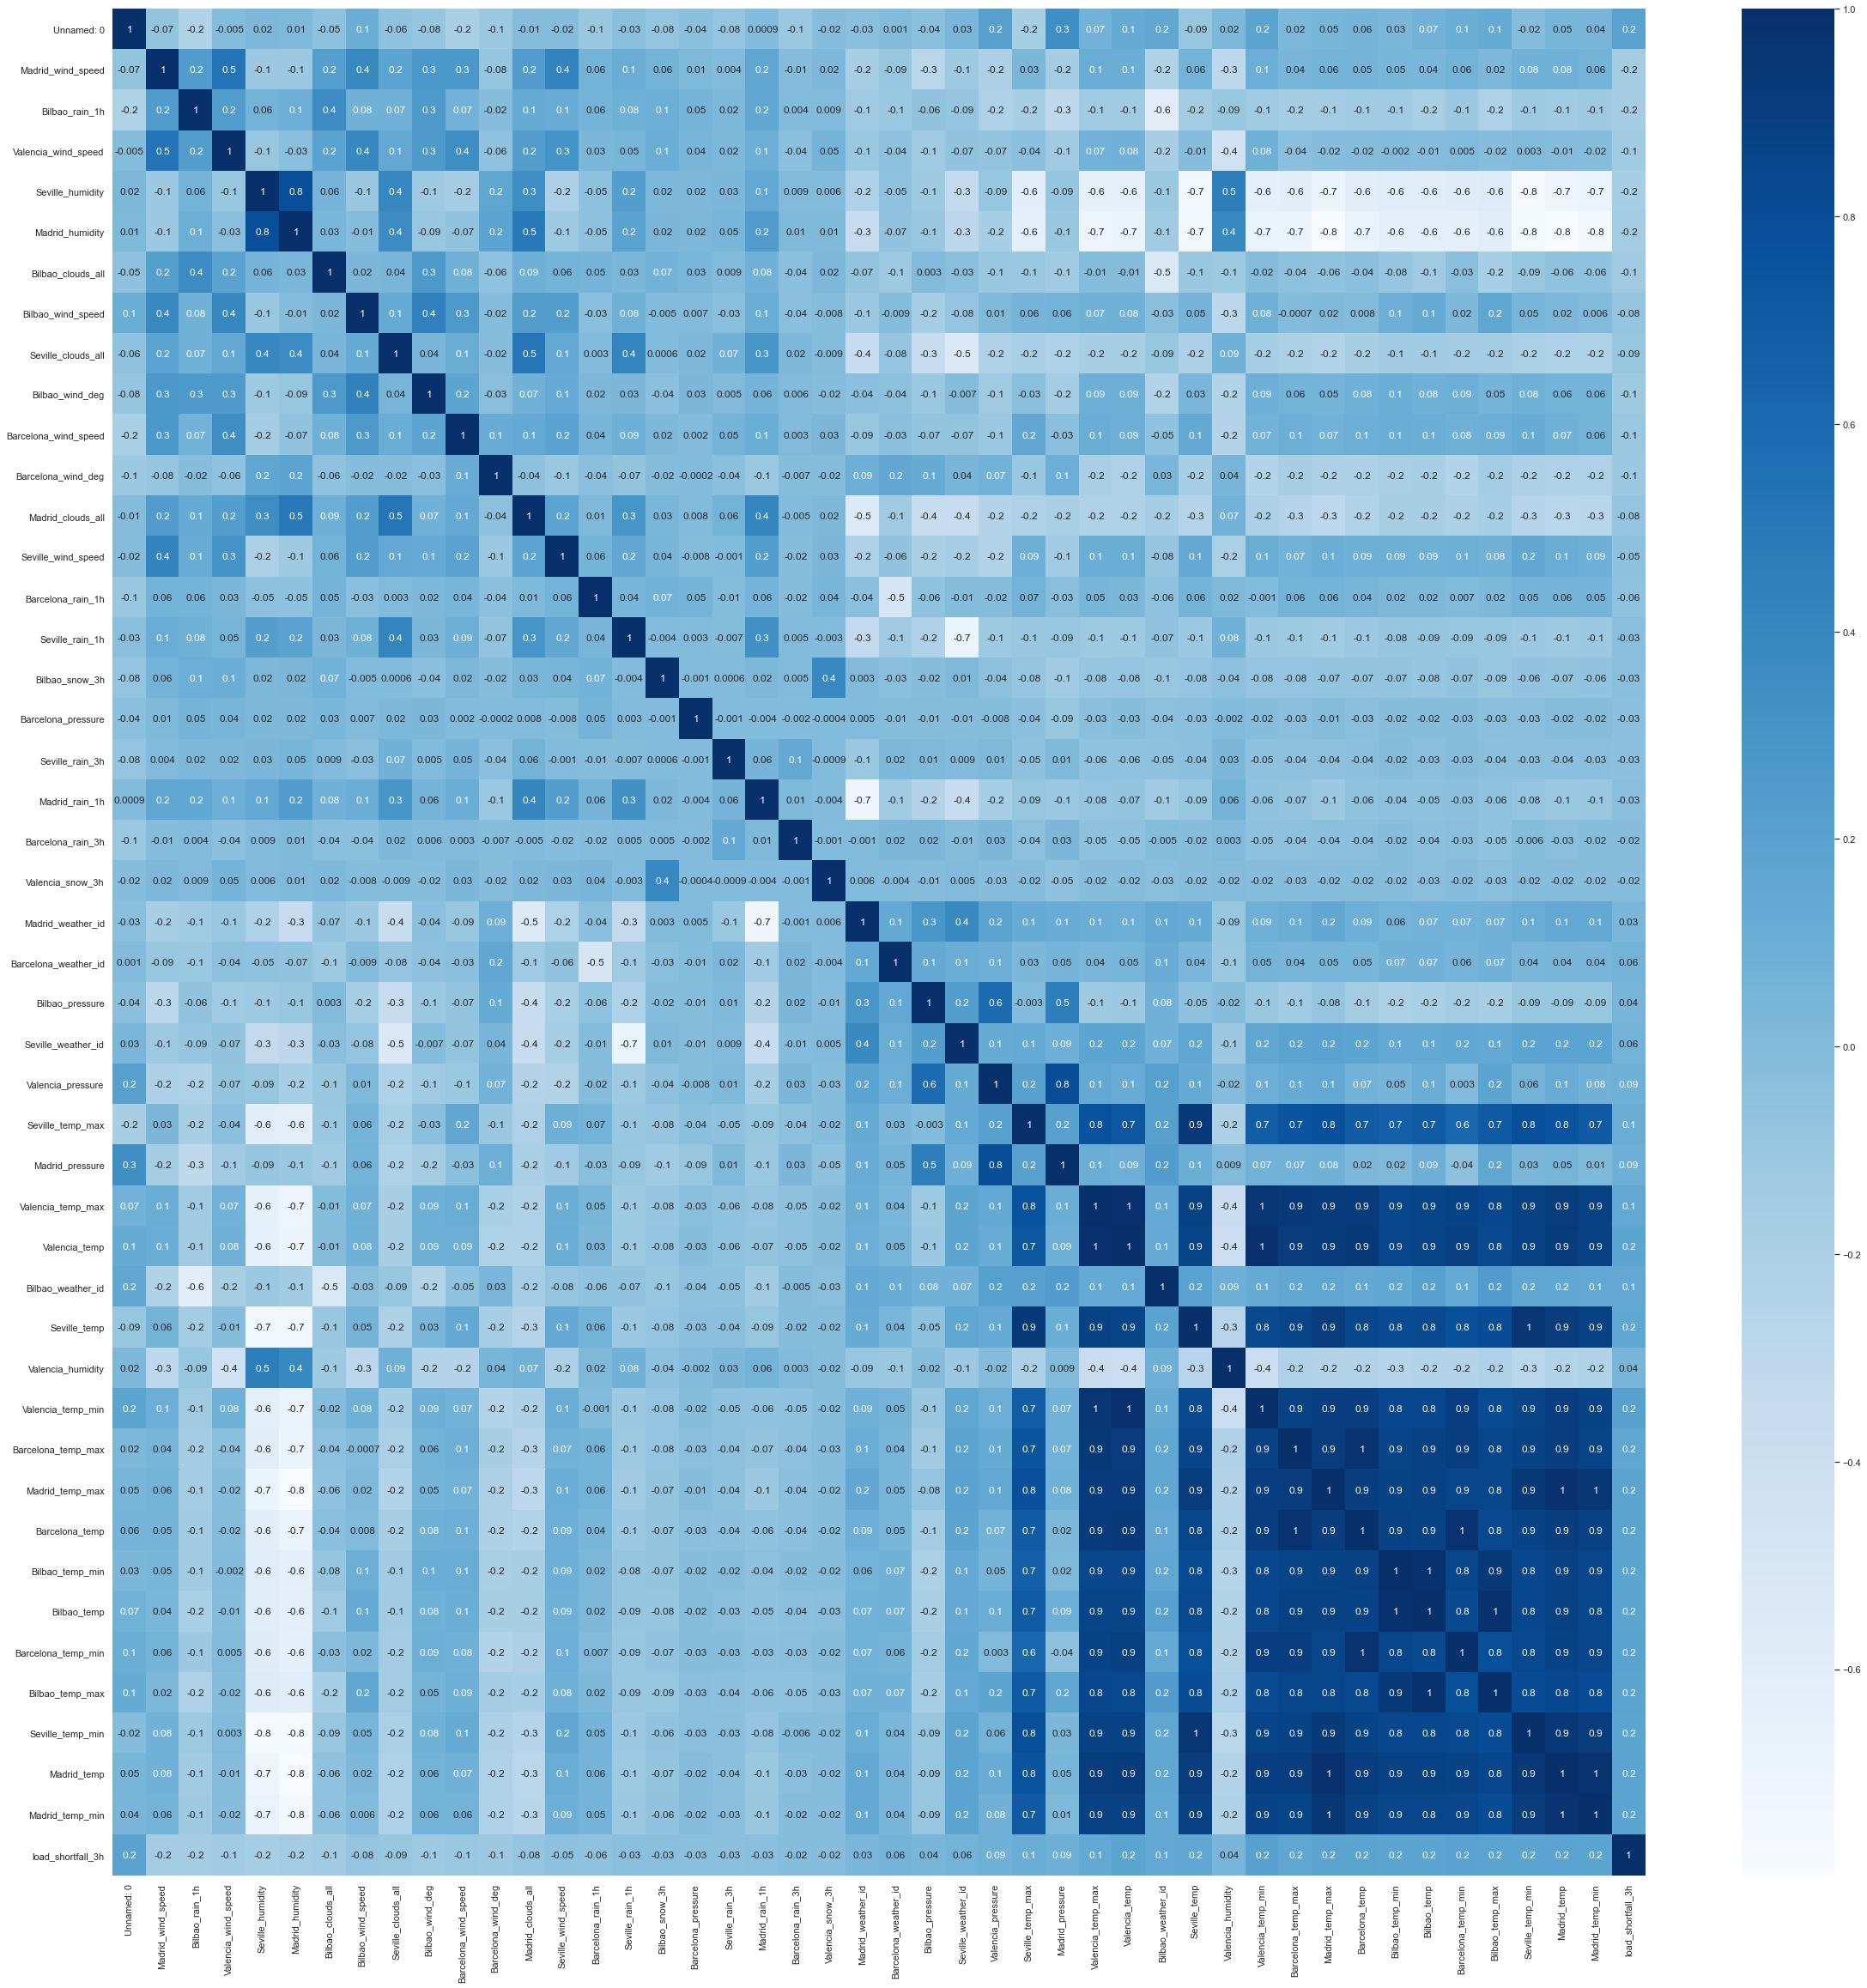

In [39]:
plt.figure(figsize=(40,40))
sns.set_theme(style="white")
corr = df.corr()
heatmap = sns.heatmap(corr, annot=True, cmap="Blues", fmt='.1g')

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section you are required to: clean the dataset, and possibly create new features - as identified in the EDA phase. |

---

In [40]:
df_clean = df
df_clean['Valencia_pressure'] = df_clean['Valencia_pressure'].fillna(df_clean['Valencia_pressure'].mode()[0])

In [41]:
df_clean['time'] = pd.to_datetime(df_clean['time'])

In [42]:
df_clean['Valencia_wind_deg'] = df_clean['Valencia_wind_deg'].str.extract('(\d+)')

In [43]:
df_clean['Valencia_wind_deg'] = pd.to_numeric(df_clean['Valencia_wind_deg'])

In [44]:
df_clean.Seville_pressure = df_clean.Seville_pressure.str.extract('(\d+)')

In [45]:
df_clean.Seville_pressure = pd.to_numeric(df_clean.Seville_pressure)

In [46]:
df_clean = df_clean.drop(['Unnamed: 0' , 'time'], axis = 1)

<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, you are required to create one or more regression models that are able to accurately predict the thee hour load shortfall. |

---

In [47]:
## Bring all imports in notebook to here with comments to indicate the different 
## accuracy packages
from sklearn.metrics import mean_squared_error
from sklearn import *
from sklearn.linear_model import *

from tqdm import tqdm
import math
import random

# data is clean let us take a look at our target variable
from scipy import stats
from scipy.stats import norm, skew #for some statistics
import seaborn as sns

In [48]:
y = df_clean[:len(df_train)][['load_shortfall_3h']]

x = df_clean[:len(df_train)].drop('load_shortfall_3h',axis=1)
# Ignore for now
x_train = df_clean[:len(df_train)].drop('load_shortfall_3h',axis=1)
x_test = df_clean[len(df_train):].drop('load_shortfall_3h',axis=1)

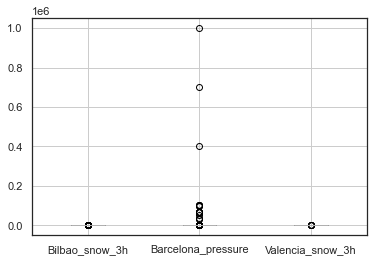

In [49]:
# dropping columns with biggest outleirs, does not positively increase the RMSE (RMSE went after after removal)
boxplot = x.boxplot(column=[
       'Bilbao_snow_3h', 'Barcelona_pressure', 'Valencia_snow_3h'])
#x = x.drop(['Bilbao_snow_3h'], axis = 1)
#x = x.drop(['Barcelona_pressure'], axis = 1)
#x = x.drop(['Valencia_snow_3h'], axis = 1)



In [50]:
# Regression Types

# Create ridge model
from sklearn.linear_model import Ridge
ridge = Ridge()

# Lasso Regression
from sklearn import linear_model
clf = linear_model.Lasso(alpha=245)

In [51]:
# Using just the training dataset to test model accuracy 
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.17) 

In [52]:
x_train.head()

,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,...,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min
2427,1.000000,1,0.0,2.000000,82.000000,84.333333,20.000000,1.333333,30.000000,96.000000,...,290.650000,287.068333,290.650000,282.520000,284.260000,290.650000,285.520000,290.648333,286.905000,286.735000
7433,4.666667,5,0.4,5.000000,26.333333,14.333333,75.000000,3.333333,0.000000,213.333333,...,303.483333,310.816667,302.483333,294.816667,295.740000,301.483333,296.483333,308.816667,308.926667,305.483333
8732,4.666667,8,0.3,4.666667,85.333333,81.333333,91.333333,0.666667,38.333333,153.333333,...,279.816667,280.483333,279.150000,276.150000,277.753333,278.483333,279.816667,284.816667,279.783333,279.150000
790,2.333333,6,0.1,1.000000,86.333333,88.333333,37.666667,2.000000,49.666667,195.000000,...,285.343656,281.860344,285.343656,286.852000,286.852000,285.343656,286.852000,286.185344,281.860344,281.860344
7236,0.666667,5,0.3,1.000000,58.000000,24.000000,92.000000,1.000000,0.000000,346.333333,...,295.816667,296.816667,295.816667,289.483333,290.233333,295.816667,291.150000,295.816667,295.093333,293.816667


In [53]:
x_test.head()

,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,...,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min
5459,2.000000,7,0.0,2.333333,83.000000,67.333333,80.666667,1.000000,0.0,124.666667,...,285.816667,282.150000,283.983333,282.150000,283.500000,282.150000,285.150000,282.150000,281.580000,281.150000
1375,1.000000,6,0.0,1.666667,52.000000,55.666667,4.000000,0.000000,0.0,119.000000,...,297.282667,300.882667,297.282667,297.939333,297.939333,297.282667,297.939333,300.966000,300.882667,300.882667
7412,1.333333,3,0.0,1.000000,77.000000,42.333333,5.333333,0.666667,0.0,33.333333,...,297.816667,298.150000,297.316667,287.483333,288.233333,296.816667,289.150000,295.483333,298.150000,298.150000
3111,1.000000,1,0.0,0.333333,71.333333,72.000000,26.000000,3.666667,0.0,169.666667,...,288.372229,287.081115,288.372229,283.440219,286.100219,288.372229,289.440219,290.571115,286.644448,286.314448
4356,1.000000,4,0.0,0.333333,73.666667,52.333333,75.000000,1.000000,0.0,123.333333,...,298.150000,297.183333,294.600000,286.890000,288.260000,291.666667,289.446667,294.816667,296.406667,295.863333


In [54]:
#use the first two lines for Ridge Regression or the last two lines for Lasso(also have to make switch later on)

#ridge.fit(x_train,y_train)
#preds = ridge.predict(x_test)

clf.fit(x_train,y_train)
preds = clf.predict(x_test)

In [56]:
# Compare model performance
from sklearn.linear_model import LinearRegression

# Create model object
lm = LinearRegression()

# Train model
lm.fit(x_train, y_train)

LinearRegression()

In [60]:
preds2 = lm.predict(x_test)

In [61]:
#Saving Model 1
import pickle

model_save_path = "lm_model.pkl"
with open(model_save_path,'wb') as file:
    pickle.dump(lm,file)

In [27]:
#Saving Model 2
import pickle

model_save_path = "clf_model.pkl"
with open(model_save_path,'wb') as file:
    pickle.dump(clf,file)

<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

In [62]:
def rmse(y_test, y_predict):
    return np.sqrt(mean_squared_error(y_test, y_predict))

In [63]:
rmse(y_test, preds2)

4685.73016894581

In [820]:
#Do Not Run This - Gives worse model performance when these are dropped, i'm still playing around with which data to use

x_train = x_train.drop(['Madrid_pressure'], axis = 1)
x_train = x_train.drop(['Valencia_pressure'], axis = 1)
x_train = x_train.drop(['Barcelona_weather_id'], axis = 1)
x_train = x_train.drop(['Seville_weather_id'], axis = 1)
x_train = x_train.drop(['Valencia_humidity'], axis = 1)
x_train = x_train.drop(['Bilbao_pressure'], axis = 1)
x_train = x_train.drop(['Madrid_weather_id'], axis = 1)
x_train = x_train.drop(['Valencia_snow_3h'], axis = 1)
x_train = x_train.drop(['Madrid_rain_1h'], axis = 1)
x_train = x_train.drop(['Seville_rain_1h'], axis = 1)
x_train = x_train.drop(['Bilbao_snow_3h'], axis = 1)
x_train = x_train.drop(['Seville_rain_3h'], axis = 1)
x_train = x_train.drop(['Barcelona_pressure'], axis = 1)
x_train = x_train.drop(['Seville_wind_speed'], axis = 1)
x_train = x_train.drop(['Barcelona_rain_1h'], axis = 1)
x_train = x_train.drop(['Barcelona_rain_3h'], axis = 1)
x_train = x_train.drop(['Bilbao_wind_speed'], axis = 1)
x_train = x_train.drop(['Madrid_clouds_all'], axis = 1)


In [25]:
rmse(y_test, preds)

4738.234074536474

In [822]:
from sklearn.metrics import r2_score

In [823]:
r2_score(y_test, preds)

0.13968755810557432

In [824]:
#submission
x_train = df_clean[:len(df_train)].drop('load_shortfall_3h',axis=1)
x_test = df_clean[len(df_train):].drop('load_shortfall_3h',axis=1)

In [825]:
#use the first two lines for Ridge Regression or the last two lines for Lasso


#ridge.fit(x_train,y)
#preds = ridge.predict(x_test)


clf.fit(x_train,y)
preds = clf.predict(x_test)

In [826]:
daf=pd.DataFrame(preds, columns=['load_shortfall_3h'])
daf.head()

,load_shortfall_3h
0,9792.201100
1,9140.898785
2,9342.365555
3,9820.720052
4,9632.973400


In [827]:
output = pd.DataFrame({"time":df_test['time']})
submission = output.join(daf)        
submission.to_csv("submission.csv", index=False)

In [828]:
submission

,time,load_shortfall_3h
0,2018-01-01 00:00:00,9792.201100
1,2018-01-01 03:00:00,9140.898785
2,2018-01-01 06:00:00,9342.365555
3,2018-01-01 09:00:00,9820.720052
4,2018-01-01 12:00:00,9632.973400
...,...,...
2915,2018-12-31 09:00:00,9268.373249
2916,2018-12-31 12:00:00,11007.196106
2917,2018-12-31 15:00:00,12353.855743
2918,2018-12-31 18:00:00,11710.489313


<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

In [ ]:
# discuss chosen methods logic